In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline

# Importing Data

In [2]:
data=pd.read_csv("C:/Users/hp/Desktop/new/local-weather.csv")
print(data.head(5))

  fogground  snowfall dust  snowdepth mist drizzle hail  fastest2minwindspeed  \
0        No       0.0   No        0.0  Yes      No   No                 17.90   
1        No       0.0   No        0.0   No      No   No                 23.04   
2        No       0.0   No        0.0   No      No   No                 21.03   
3        No       0.0   No        0.0   No      No   No                 23.94   
4        No       0.0   No        0.0   No      No   No                 16.11   

  thunder glaze  ... freezingrain rain highwind        date  precipitation  \
0      No    No  ...           No  Yes       No  2007-01-06           0.13   
1      No    No  ...           No  Yes       No  2007-01-09           0.00   
2      No    No  ...           No   No       No  2007-01-14           0.00   
3      No    No  ...           No   No       No  2007-01-15           0.00   
4      No    No  ...           No   No       No  2007-01-20           0.00   

  fogheavy  smokehaze avgwindspeed fastest2m

# Handling Duplicate Values

In [3]:
#Checking Duplicate records
dup=data.duplicated()
sum(dup)

0

# Feature Transformation- date column

In [4]:
#converting date column to datatime
data['date'] = pd.to_datetime(data['date'])

In [5]:
#Splitting date into 3 seperate coloumns year, month and da
data['date_year']= data['date'].dt.year
data['date_month']= data['date'].dt.month
data['date_day']= data['date'].dt.day

In [6]:
#Dropping date column
data=data.drop('date',1)
data

,fogground,snowfall,dust,snowdepth,mist,drizzle,hail,fastest2minwindspeed,thunder,glaze,...,highwind,precipitation,fogheavy,smokehaze,avgwindspeed,fastest2minwinddir,fastest5secwinddir,date_year,date_month,date_day
0,No,0.0,No,0.0,Yes,No,No,17.90,No,No,...,No,0.13,No,No,8.05,230.0,230.0,2007,1,6
1,No,0.0,No,0.0,No,No,No,23.04,No,No,...,No,0.00,No,No,7.61,280.0,270.0,2007,1,9
2,No,0.0,No,0.0,No,No,No,21.03,No,No,...,No,0.00,No,No,8.50,230.0,230.0,2007,1,14
3,No,0.0,No,0.0,No,No,No,23.94,No,No,...,No,0.00,No,No,13.20,230.0,230.0,2007,1,15
4,No,0.0,No,0.0,No,No,No,16.11,No,No,...,No,0.00,No,No,4.92,290.0,320.0,2007,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,No,0.0,No,0.0,No,No,No,23.94,No,No,...,No,0.00,No,No,11.41,230.0,230.0,2020,3,9
4843,No,0.0,No,0.0,No,No,No,17.00,Yes,No,...,No,0.86,No,No,7.16,280.0,280.0,2020,3,25
4844,No,0.0,No,0.0,No,No,No,14.99,No,No,...,No,0.00,No,No,5.14,230.0,230.0,2020,3,26
4845,No,0.0,No,0.0,No,No,No,17.00,No,No,...,No,0.00,No,No,8.50,240.0,230.0,2020,3,27


# Feature Encoding

In [7]:
#Encoding only the target variable to 0 and 1
np.unique(data['rain'])
mapping={label:idx for idx, label in enumerate(np.unique(data['rain']))}
mapping


{'No': 0, 'Yes': 1}

In [8]:
#merging rain column after encoding
data['rain']=data['rain'].map(mapping)


In [9]:
#list of catogorical featres to be encoded
todummy_list=['fogground','dust','mist','drizzle','hail','thunder','glaze','snow','ice','fog','freezingfog','blowingsnow','freezingrain','highwind','fogheavy','smokehaze']

In [10]:
#Encoding the features by adding dummies
def dummy_df(data, todummy_list):
    for x in todummy_list:
        dummies=pd.get_dummies(data[x], prefix=x, dummy_na=False)
        data=data.drop(x,1)
        data=pd.concat([data,dummies],axis=1)
    return data


In [11]:
#Merging the dummy variables with the data
df=dummy_df(data,todummy_list)
print(df.head(5))


   snowfall  snowdepth  fastest2minwindspeed  temperaturemin  \
0       0.0        0.0                 17.90            50.0   
1       0.0        0.0                 23.04            30.0   
2       0.0        0.0                 21.03            50.0   
3       0.0        0.0                 23.94            57.0   
4       0.0        0.0                 16.11            26.1   

   fastest5secwindspeed  temperaturemax  rain  precipitation  avgwindspeed  \
0                 21.92            71.1     1           0.13          8.05   
1                 29.08            55.0     1           0.00          7.61   
2                 25.05            73.9     0           0.00          8.50   
3                 29.08            73.9     0           0.00         13.20   
4                 21.03            48.0     0           0.00          4.92   

   fastest2minwinddir  ...  blowingsnow_No  blowingsnow_Yes  freezingrain_No  \
0               230.0  ...               1                0       

# Handling missing values

In [12]:
#imputer to handle missing values
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df)
df=pd.DataFrame(data=imp.transform(df),columns=df.columns)

#imputer
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values='NaN',strategy='median',axis=0)
imp.fit(df)
df=pd.DataFrame(data=imp.transform(df),columns=df.columns)

In [13]:
df.isnull().sum()

snowfall                0
snowdepth               0
fastest2minwindspeed    0
temperaturemin          0
fastest5secwindspeed    0
temperaturemax          0
rain                    0
precipitation           0
avgwindspeed            0
fastest2minwinddir      0
fastest5secwinddir      0
date_year               0
date_month              0
date_day                0
fogground_No            0
fogground_Yes           0
dust_No                 0
dust_Yes                0
mist_No                 0
mist_Yes                0
drizzle_No              0
drizzle_Yes             0
hail_No                 0
hail_Yes                0
thunder_No              0
thunder_Yes             0
glaze_No                0
glaze_Yes               0
snow_No                 0
snow_Yes                0
ice_No                  0
ice_Yes                 0
fog_No                  0
fog_Yes                 0
freezingfog_No          0
freezingfog_Yes         0
blowingsnow_No          0
blowingsnow_Yes         0
freezingrain

In [14]:
#sPlitting the data into independent and dependent columns
x=df.drop('rain',1) #dependent
y=df.rain           #Independent

# Exploratory Data Analysis

In [15]:
count_classes=pd.value_counts(df['rain'], sort= True)
count_classes

0.0    3974
1.0     873
Name: rain, dtype: int64

# Handling Imbalanced dataset - Under Sampling

In [16]:
#machine learning algorith will get biased if there are imbalanced classes
#choosing under sampling as we have more number of records.
undersample = RandomUnderSampler(sampling_strategy='majority')
x,y = undersample.fit_resample(x,y)




In [17]:
#splitting data into test set and train set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


In [18]:
#To select the maximum performing feature set
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
for index in range(1,42):
    sel= RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select=index)
    sel.fit(x_train, y_train)
    x_train_rfe=sel.transform(x_train)
    x_test_rfe=sel.transform(x_test)
    print("selected feature", index )
    clf = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')
    clf = clf.fit(x_train_rfe,y_train)
    y_pred_gini = clf.predict(x_test_rfe)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gini)*100,"%")
    '''

'\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.metrics import accuracy_score\nimport sklearn.metrics as metrics\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.feature_selection import RFE\nfor index in range(1,42):\n    sel= RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select=index)\n    sel.fit(x_train, y_train)\n    x_train_rfe=sel.transform(x_train)\n    x_test_rfe=sel.transform(x_test)\n    print("selected feature", index )\n    clf = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = \'sqrt\')\n    clf = clf.fit(x_train_rfe,y_train)\n    y_pred_gini = clf.predict(x_test_rfe)\n    print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gini)*100,"%")\n    '

# Feature Selection

In [19]:
#Feature selection by Recursive Feature elimination(RFE) with random forest
#This is how we select number of features to improve accuracy and reduce the training time
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
sel= RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select=13)
sel.fit(x_train, y_train)


RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=-1,
                                     oob_score=False, random_state=0, verbose=0,
                                     warm_start=False),
    n_features_to_select=13, step=1, verbose=0)

In [20]:
#fitting into RFE
x_train_rfe=sel.transform(x_train)
x_test_rfe=sel.transform(x_test)

# Feature Scaling

In [21]:
#feature scaling(-1 and 1) will make alogorithm fast to run
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train_rfe)
x_test=sc_x.transform(x_test_rfe)

# Applying Model and evaluation

In [22]:
clf = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')# Creating Random Forest Classifier object
clf = clf.fit(x_train,y_train)  # Train Random Forest Classifier
y_pred= clf.predict(x_test)    #Predict the response for test dataset
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100,"%")   # Model Accuracy, how often is the classifier correct?
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy: 91.98473282442748 %
Confusion matrix:
[[250  13]
 [ 29 232]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92       263
         1.0       0.95      0.89      0.92       261

    accuracy                           0.92       524
   macro avg       0.92      0.92      0.92       524
weighted avg       0.92      0.92      0.92       524



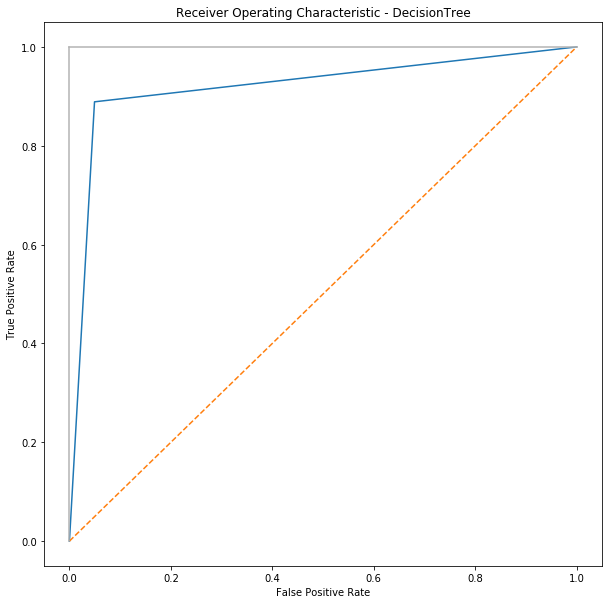

In [23]:
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
#applying k-fold cross validation to check model performance
#we will get 10 accoracies based 10 test set
accuracies= cross_val_score(estimator=clf, X = x_train, y = y_train, cv=10)
print("Evatulation accuracy with K-fold cross validation:",accuracies.mean()*100,"%")

Evatulation accuracy with K-fold cross validation: 90.10129281620684 %


In [25]:
#ROC
results = cross_val_score(estimator=clf, X = x_train, y = y_train, cv=10, scoring='roc_auc')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.976 (0.014)


In [26]:
#neg_log_loss
results = cross_val_score(estimator=clf, X = x_train, y = y_train, cv=10, scoring='neg_log_loss')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: -0.203 (0.049)
